In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Prepare the Data

In [2]:
# Read myopia.csv into a Pandas DataFrame
mlb_teams_df = pd.read_csv("Resources/mlb_teams.csv")
mlb_teams_df

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2020,NL,C,3,58,27.0,30,28,N,Y,...,376,69,204,464,33,46,0.983,St. Louis Cardinals,Busch Stadium III,0.0
2780,2020,AL,E,1,60,29.0,40,20,Y,N,...,475,70,168,552,33,52,0.985,Tampa Bay Rays,Tropicana Field,0.0
2781,2020,AL,W,5,60,30.0,22,38,N,N,...,479,81,236,489,40,40,0.981,Texas Rangers,Globe Life Field,0.0
2782,2020,AL,E,3,60,26.0,32,28,N,Y,...,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0


In [3]:
# Use data from 1970 through 2019 because 1970
# 1970: is when batters_hit_by_pith and sacrifice_flies started being tracked
# Drop the year 2020 because it was shorted due to Covid
mlb_teams_df = mlb_teams_df.loc[(mlb_teams_df['year'] >= 1970) & (mlb_teams_df['year'] < 2020)]
mlb_teams_df

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
1370,1970,NL,W,5,162,81.0,76,86,N,NaN,...,1451,185,478,960,141,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0
1371,1970,AL,E,1,162,81.0,108,54,Y,NaN,...,1317,139,469,941,117,148,0.981,Baltimore Orioles,Memorial Stadium,1057069.0
1372,1970,AL,E,3,162,81.0,87,75,N,NaN,...,1391,156,594,1003,156,131,0.974,Boston Red Sox,Fenway Park II,1595278.0
1373,1970,AL,W,3,162,81.0,86,76,N,NaN,...,1280,154,559,922,127,169,0.980,California Angels,Anaheim Stadium,1077741.0
1374,1970,AL,W,6,162,84.0,56,106,N,NaN,...,1554,164,556,762,165,187,0.975,Chicago White Sox,Comiskey Park,495355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2019,NL,C,1,162,81.0,91,71,Y,N,...,1284,191,545,1399,66,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0
2750,2019,AL,E,2,162,81.0,96,66,N,Y,...,1274,181,453,1621,87,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0
2751,2019,AL,W,3,162,81.0,78,84,N,N,...,1515,241,583,1379,105,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0
2752,2019,AL,E,4,162,81.0,67,95,N,N,...,1450,228,604,1332,96,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0


In [4]:
# Reset the index for the DataFrame
mlb_teams_df.reset_index(drop=True, inplace=True)
mlb_teams_df

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1970,NL,W,5,162,81.0,76,86,N,NaN,...,1451,185,478,960,141,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0
1,1970,AL,E,1,162,81.0,108,54,Y,NaN,...,1317,139,469,941,117,148,0.981,Baltimore Orioles,Memorial Stadium,1057069.0
2,1970,AL,E,3,162,81.0,87,75,N,NaN,...,1391,156,594,1003,156,131,0.974,Boston Red Sox,Fenway Park II,1595278.0
3,1970,AL,W,3,162,81.0,86,76,N,NaN,...,1280,154,559,922,127,169,0.980,California Angels,Anaheim Stadium,1077741.0
4,1970,AL,W,6,162,84.0,56,106,N,NaN,...,1554,164,556,762,165,187,0.975,Chicago White Sox,Comiskey Park,495355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2019,NL,C,1,162,81.0,91,71,Y,N,...,1284,191,545,1399,66,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0
1380,2019,AL,E,2,162,81.0,96,66,N,Y,...,1274,181,453,1621,87,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0
1381,2019,AL,W,3,162,81.0,78,84,N,N,...,1515,241,583,1379,105,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0
1382,2019,AL,E,4,162,81.0,67,95,N,N,...,1450,228,604,1332,96,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0


In [5]:
mlb_teams_df = mlb_teams_df[['year', 'team_name', 'games_played', 'wins', 'losses', 'runs_scored', 'hits', 'doubles', 'triples', 'homeruns', 'walks',
                            'strikeouts_by_batters', 'stolen_bases', 'caught_stealing', 'batters_hit_by_pitch', 'sacrifice_flies',
                            'opponents_runs_scored', 'earned_runs_allowed', 'complete_games', 'shutouts', 'saves', 'outs_pitches',
                            'hits_allowed', 'homeruns_allowed', 'walks_allowed', 'strikeouts_by_pitchers', 'errors', 'double_plays',
                            'fielding_percentage']]
mlb_teams_df

,year,team_name,games_played,wins,losses,runs_scored,hits,doubles,triples,homeruns,...,shutouts,saves,outs_pitches,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage
0,1970,Atlanta Braves,162,76,86,736,1495,215,24,160,...,9,24,4292,1451,185,478,960,141,118,0.977
1,1970,Baltimore Orioles,162,108,54,792,1424,213,25,179,...,12,31,4436,1317,139,469,941,117,148,0.981
2,1970,Boston Red Sox,162,87,75,786,1450,252,28,203,...,8,44,4339,1391,156,594,1003,156,131,0.974
3,1970,California Angels,162,86,76,631,1391,197,40,114,...,10,49,4387,1280,154,559,922,127,169,0.980
4,1970,Chicago White Sox,162,56,106,633,1394,192,20,123,...,6,30,4291,1554,164,556,762,165,187,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2019,St. Louis Cardinals,162,91,71,764,1336,246,24,210,...,14,52,4332,1284,191,545,1399,66,168,0.989
1380,2019,Tampa Bay Rays,162,96,66,769,1427,291,29,217,...,12,46,4423,1274,181,453,1621,87,126,0.985
1381,2019,Texas Rangers,162,78,84,810,1374,296,24,223,...,9,33,4314,1515,241,583,1379,105,143,0.982
1382,2019,Toronto Blue Jays,162,67,95,726,1299,270,21,247,...,7,33,4321,1450,228,604,1332,96,141,0.984


In [6]:
mlb_working_df = mlb_teams_df.drop(columns=['year', 'team_name'])
mlb_working_df

,games_played,wins,losses,runs_scored,hits,doubles,triples,homeruns,walks,strikeouts_by_batters,...,shutouts,saves,outs_pitches,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage
0,162,76,86,736,1495,215,24,160,522,736.0,...,9,24,4292,1451,185,478,960,141,118,0.977
1,162,108,54,792,1424,213,25,179,717,952.0,...,12,31,4436,1317,139,469,941,117,148,0.981
2,162,87,75,786,1450,252,28,203,594,855.0,...,8,44,4339,1391,156,594,1003,156,131,0.974
3,162,86,76,631,1391,197,40,114,447,922.0,...,10,49,4387,1280,154,559,922,127,169,0.980
4,162,56,106,633,1394,192,20,123,477,872.0,...,6,30,4291,1554,164,556,762,165,187,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,162,91,71,764,1336,246,24,210,561,1420.0,...,14,52,4332,1284,191,545,1399,66,168,0.989
1380,162,96,66,769,1427,291,29,217,542,1493.0,...,12,46,4423,1274,181,453,1621,87,126,0.985
1381,162,78,84,810,1374,296,24,223,534,1578.0,...,9,33,4314,1515,241,583,1379,105,143,0.982
1382,162,67,95,726,1299,270,21,247,509,1514.0,...,7,33,4321,1450,228,604,1332,96,141,0.984


In [7]:
# Standardize your dataset with StandarScaler so that columns that contain larger values do not influence the outcome more than columns with smaller values
mlb_teams_scaled = StandardScaler().fit_transform(mlb_working_df)
mlb_teams_scaled

array([[ 0.2526988 , -0.29808052,  0.51307996, ...,  1.03879825,
        -1.45883366, -1.08848636],
       [ 0.2526988 ,  2.29296756, -2.08535175, ...,  0.0617702 ,
         0.017674  ,  0.00672638],
       [ 0.2526988 ,  0.59259226, -0.38013094, ...,  1.64944078,
        -0.81901368, -1.90989592],
       ...,
       [ 0.2526988 , -0.13614001,  0.35067798, ..., -0.42674383,
        -0.22841061,  0.28052956],
       [ 0.2526988 , -1.02681279,  1.24388888, ..., -0.79312935,
        -0.32684446,  0.82813593],
       [ 0.2526988 ,  1.07841377, -0.86733689, ..., -1.15951487,
        -1.80335212,  1.10193912]])

### Apply Dimensionality Reduction

In [8]:
"""Perform dimensionality reduction with PCA"""

# Initialize PCA model
pca = PCA(n_components=0.95)

# Get principal components for the data.
mlb_teams_pca = pca.fit_transform(mlb_teams_scaled)
mlb_teams_pca.shape

(1384, 14)

In [9]:
# Transform PCA data to a DataFrame
df_mlb_teams_pca = pd.DataFrame(data=mlb_teams_pca, columns=[
        "principal component 1",
        "principal component 2",
        "principal component 3",
        "principal component 4",
        "principal component 5",
        "principal component 6",
        "principal component 7",
        "principal component 8",
        "principal component 9",
        "principal component 10",
        "principal component 11",
        "principal component 12",
        "principal component 13",
        "principal component 14"
    ]
)
df_mlb_teams_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,0.689904,-1.351458,0.877977,0.386132,-2.353126,0.966782,1.446647,0.773366,-0.392318,1.365573,-1.211881,0.564032,-0.035832,0.961844
1,1.040458,0.902507,-3.613668,0.338348,-3.189922,1.541141,-0.820224,1.459115,0.713316,0.164258,-0.565587,-0.832052,-0.059229,1.076488
2,-0.138124,-1.172451,-0.928896,0.529479,-2.014863,2.430838,1.043395,-0.772091,-0.094113,-0.552601,-0.034241,0.676337,0.408302,0.940153
3,1.644686,0.041470,-0.282057,-1.304417,-0.887215,-0.825686,-0.127103,-1.651379,0.792253,-1.543243,-0.289819,0.267087,1.066699,0.652332
4,0.478752,-3.543288,3.155494,-0.343605,-1.958968,-0.145535,-0.598277,-1.479173,-1.045961,0.680881,0.456464,-0.745214,0.992220,0.150091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,-2.537555,4.229033,-0.438565,-1.581557,0.206507,0.077073,-1.827462,0.573853,0.997789,-0.514826,0.751868,-0.327015,1.315073,0.093380
1380,-2.460515,4.510190,-0.807680,-1.765775,0.432264,1.181576,0.806420,0.484367,1.115629,0.317922,0.075669,-0.108011,0.042804,0.298382
1381,-4.323173,0.956525,2.052247,-0.375108,0.590645,1.502689,0.326400,1.450552,0.607372,0.908332,0.388611,-0.053734,1.165179,-0.734601
1382,-3.218737,1.731542,4.020672,-1.352247,-0.973497,1.075321,0.146688,0.837550,0.882873,-0.418008,-1.033233,0.314940,0.873427,-0.525973


In [10]:
"""Further reduce the dataset dimensions with t-SNE and visually inspect the results"""

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [11]:
# Further reduce dimensions and inspect the results
tsne_features = tsne.fit_transform(df_mlb_teams_pca)

tsne_features.shape

c:\Users\paulb\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(1384, 2)

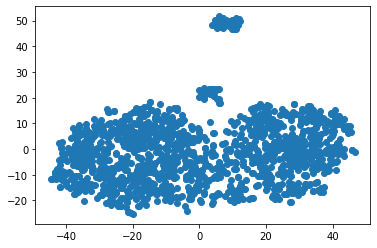

In [12]:
# Prepare to plot the dataset

# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Perform a Cluster Analysis with K-means

c:\Users\paulb\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "


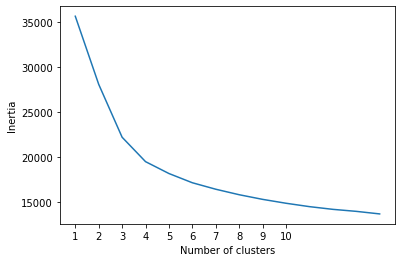

In [13]:
"""Create an elbow plot to identify the best number of clusters"""

inertia = []
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_mlb_teams_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
# Identify the best number of clusters using the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,35629.041840
1,2,28078.516748
2,3,22211.257066
3,4,19505.614726
4,5,18188.291269


In [15]:
"""Predicting clusters with k=4"""

# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(df_mlb_teams_pca)

# Predict clusters
predictions = model.predict(df_mlb_teams_pca)
# print(predictions)

df_mlb_teams_pca_prediction = df_mlb_teams_pca
# Create return DataFrame with predicted clusters
df_mlb_teams_pca_prediction["class"] = model.labels_

df_mlb_teams_pca_prediction

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,class
0,0.689904,-1.351458,0.877977,0.386132,-2.353126,0.966782,1.446647,0.773366,-0.392318,1.365573,-1.211881,0.564032,-0.035832,0.961844,1
1,1.040458,0.902507,-3.613668,0.338348,-3.189922,1.541141,-0.820224,1.459115,0.713316,0.164258,-0.565587,-0.832052,-0.059229,1.076488,1
2,-0.138124,-1.172451,-0.928896,0.529479,-2.014863,2.430838,1.043395,-0.772091,-0.094113,-0.552601,-0.034241,0.676337,0.408302,0.940153,1
3,1.644686,0.041470,-0.282057,-1.304417,-0.887215,-0.825686,-0.127103,-1.651379,0.792253,-1.543243,-0.289819,0.267087,1.066699,0.652332,1
4,0.478752,-3.543288,3.155494,-0.343605,-1.958968,-0.145535,-0.598277,-1.479173,-1.045961,0.680881,0.456464,-0.745214,0.992220,0.150091,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,-2.537555,4.229033,-0.438565,-1.581557,0.206507,0.077073,-1.827462,0.573853,0.997789,-0.514826,0.751868,-0.327015,1.315073,0.093380,0
1380,-2.460515,4.510190,-0.807680,-1.765775,0.432264,1.181576,0.806420,0.484367,1.115629,0.317922,0.075669,-0.108011,0.042804,0.298382,0
1381,-4.323173,0.956525,2.052247,-0.375108,0.590645,1.502689,0.326400,1.450552,0.607372,0.908332,0.388611,-0.053734,1.165179,-0.734601,2
1382,-3.218737,1.731542,4.020672,-1.352247,-0.973497,1.075321,0.146688,0.837550,0.882873,-0.418008,-1.033233,0.314940,0.873427,-0.525973,2


In [16]:
# Append the class prediction column onto the original DataFrame that includes the year and team_name
mlb_teams_df['class'] = model.labels_
mlb_teams_df

c:\Users\paulb\anaconda3\envs\PythonDataOne\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,team_name,games_played,wins,losses,runs_scored,hits,doubles,triples,homeruns,...,saves,outs_pitches,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,class
0,1970,Atlanta Braves,162,76,86,736,1495,215,24,160,...,24,4292,1451,185,478,960,141,118,0.977,1
1,1970,Baltimore Orioles,162,108,54,792,1424,213,25,179,...,31,4436,1317,139,469,941,117,148,0.981,1
2,1970,Boston Red Sox,162,87,75,786,1450,252,28,203,...,44,4339,1391,156,594,1003,156,131,0.974,1
3,1970,California Angels,162,86,76,631,1391,197,40,114,...,49,4387,1280,154,559,922,127,169,0.980,1
4,1970,Chicago White Sox,162,56,106,633,1394,192,20,123,...,30,4291,1554,164,556,762,165,187,0.975,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2019,St. Louis Cardinals,162,91,71,764,1336,246,24,210,...,52,4332,1284,191,545,1399,66,168,0.989,0
1380,2019,Tampa Bay Rays,162,96,66,769,1427,291,29,217,...,46,4423,1274,181,453,1621,87,126,0.985,0
1381,2019,Texas Rangers,162,78,84,810,1374,296,24,223,...,33,4314,1515,241,583,1379,105,143,0.982,2
1382,2019,Toronto Blue Jays,162,67,95,726,1299,270,21,247,...,33,4321,1450,228,604,1332,96,141,0.984,2


In [17]:
# Export CSV
mlb_teams_df.to_csv("Resources/mlb_teams_classified.csv")

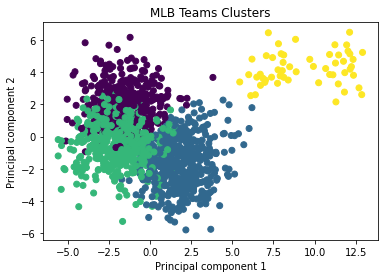

In [21]:
# Visualize the clusters
plt.scatter(df_mlb_teams_pca_prediction['principal component 1'], df_mlb_teams_pca_prediction['principal component 2'], c=df_mlb_teams_pca_prediction['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('MLB Teams Clusters')
plt.savefig('Resources/cluster_analysis.png')
plt.show()